In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

##Gerando um sinal com ruído aleatório para servir de entrada para os filtros digitais

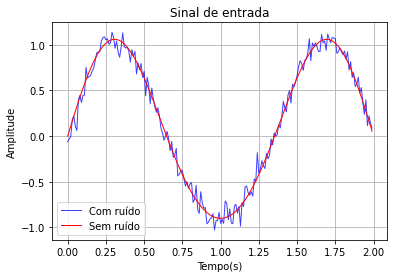

In [ ]:
rng = np.random.default_rng()#Valores aleatórios
tempo = np.arange(0, 2, 0.01)#Vetor de tempo

inputSignal = (np.sin(2*np.pi*0.75*tempo) + 0.1*np.sin(2*np.pi*1.25*tempo)) #Sinal de entrada sem ruído
noisyImputSignal = inputSignal + rng.standard_normal(len(tempo)) * 0.08 #Sinal de entrada com ruído

plt.plot(tempo,noisyImputSignal,'b', linewidth = 1,alpha = 0.75)
plt.plot(tempo,inputSignal,'r',linewidth = 1)
plt.legend(('Com ruído', 'Sem ruído'), loc='best')
plt.grid()
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.title('Sinal de entrada')
plt.show()

#Questão 1:

In [ ]:
N = 6 #Ordem do filtro
Wc = 0.766

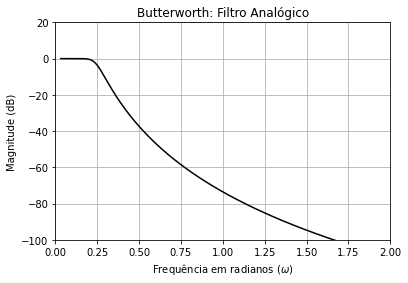

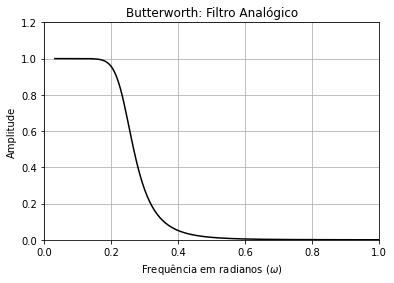

In [ ]:
##FILTRO ANALÓGICO
numSButter, denSButter = signal.butter(N, Wc, 'low', analog=True) #Func de Trasnferencia: Filtro Analógico
wSButter, hSButter = signal.freqs(numSButter,denSButter) #Resposta à freq: Filtro Analógico
hSButter_dB = 20 * np.log10(np.abs(hSButter))

plt.plot(wSButter/np.pi, hSButter_dB, 'k')
plt.ylim(-100, 20)
plt.xlim(0, 2)
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequência em radianos ($\omega$)')
plt.title('Butterworth: Filtro Analógico')
plt.grid()
plt.show()
print()

plt.plot(wSButter/np.pi,abs(hSButter),'k')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1.2)
plt.xlabel('Frequência em radianos ($\omega$)')
plt.ylabel('Amplitude')
plt.title('Butterworth: Filtro Analógico')
plt.show()

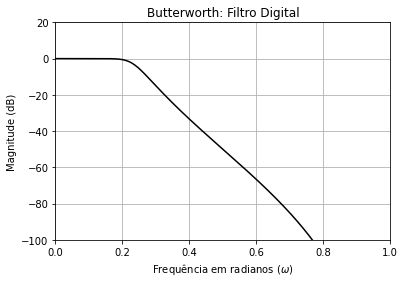

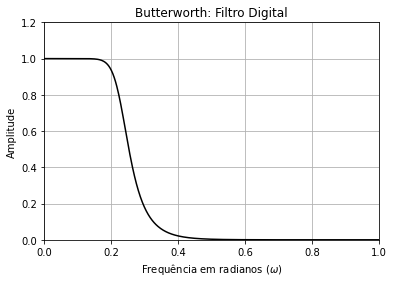

In [ ]:
##FILTRO DIGITAL
numZButter, denZButter = signal.bilinear(numSButter, denSButter) #Trasnf. bilinear para tempo discreto
wZButter, hZButter = signal.freqz(numZButter, denZButter) #Resposta à frequencia: Filtro Digital
hZButter_dB = 20 * np.log10(np.abs(hZButter))

plt.plot(wZButter/np.pi, hZButter_dB, 'k')
plt.ylim(-100, 20)
plt.xlim(0, 1)
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequência em radianos ($\omega$)')
plt.title('Butterworth: Filtro Digital')
plt.grid()
plt.show()
print()

plt.plot(wZButter/np.pi,abs(hZButter),'k')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1.2)
plt.xlabel('Frequência em radianos ($\omega$)')
plt.ylabel('Amplitude')
plt.title('Butterworth: Filtro Digital')
plt.show()

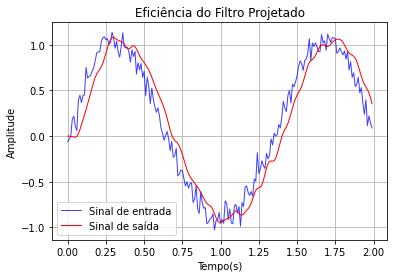

In [ ]:
##EFICIENCIA DO FILTRO DIGITAL

outputSignalButter = signal.lfilter(numZButter, denZButter, noisyImputSignal)#Sinal filtrado(Filtro Digital)

plt.plot(tempo, noisyImputSignal, 'b', alpha=0.75, linewidth = 1)
plt.plot(tempo, outputSignalButter, 'r',linewidth = 1)
plt.legend(('Sinal de entrada', 'Sinal de saída'), loc='lower left')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.title('Eficiência do Filtro Projetado')
plt.grid()
plt.show()

#QUESTÃO 2:

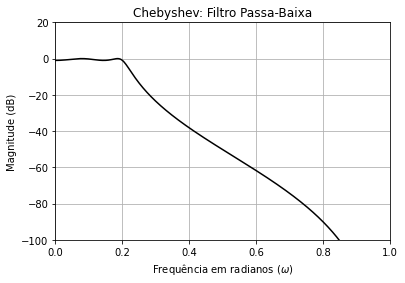

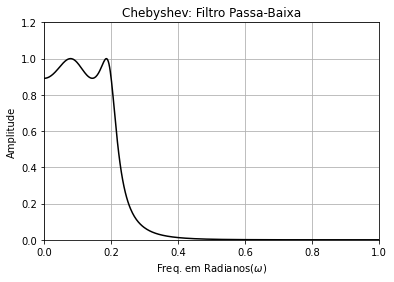

In [ ]:
numChebyL, denChebyL = signal.cheby1(4, 1, 0.2, 'low',analog=False)
wChebyL, hChebyL = signal.freqz(numChebyL,denChebyL) #Resposta à freq: Filtro Digital
hChebyL_dB = 20 * np.log10(np.abs(hChebyL))

plt.plot(wChebyL/np.pi, hChebyL_dB, 'k')
plt.ylim(-100, 20)
plt.xlim(0, 1)
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequência em radianos ($\omega$)')
plt.title('Chebyshev: Filtro Passa-Baixa')
plt.grid()
plt.show()
print()

plt.plot(wChebyL/np.pi,abs(hChebyL),'k')
plt.margins(0,0.1)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1.2)
plt.xlabel('Freq. em Radianos($\omega$)')
plt.ylabel('Amplitude')
plt.title('Chebyshev: Filtro Passa-Baixa')
plt.show()

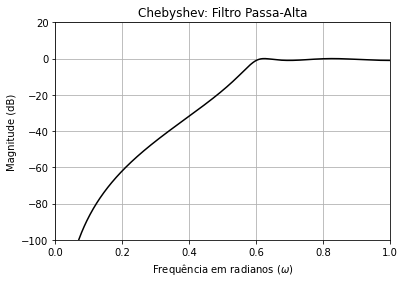

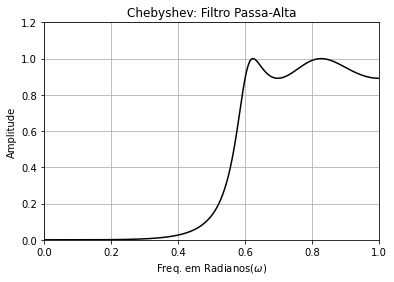

In [ ]:
numChebyH , denChebyH = signal.cheby1(4, 1, 0.6, 'hp', analog = False)
wChebyH, hChebyH = signal.freqz(numChebyH,denChebyH) #Resposta à freq: Filtro Digital
hChebyH_dB = 20 * np.log10(np.abs(hChebyH))

plt.plot(wChebyH/np.pi, hChebyH_dB, 'k')
plt.ylim(-100, 20)
plt.xlim(0, 1)
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequência em radianos ($\omega$)')
plt.title('Chebyshev: Filtro Passa-Alta')
plt.grid()
plt.show()
print()

plt.plot(wChebyH/np.pi,abs(hChebyH),'k')
plt.margins(0,0.1)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1.2)
plt.xlabel('Freq. em Radianos($\omega$)')
plt.ylabel('Amplitude')
plt.title('Chebyshev: Filtro Passa-Alta')
plt.show()

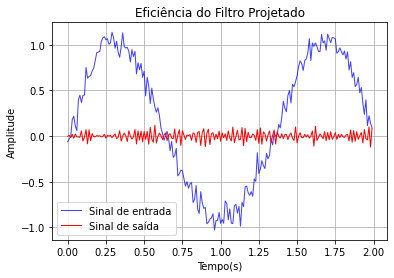

In [ ]:
outputSignalCheby = signal.lfilter(numChebyH, denChebyH, noisyImputSignal)#Sinal filtrado(Filtro Digital)

plt.plot(tempo, noisyImputSignal, 'b', alpha=0.75, linewidth = 1)
plt.plot(tempo, outputSignalCheby, 'r',linewidth = 1)
plt.legend(('Sinal de entrada', 'Sinal de saída'), loc='lower left')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.title('Eficiência do Filtro Projetado')
plt.grid()
plt.show()

#Questão 3

In [ ]:
M = 40
B = 5.653
Wn = 0.5

In [ ]:
Kaiser = signal.firwin(M, cutoff = Wn, window = ("kaiser", B))

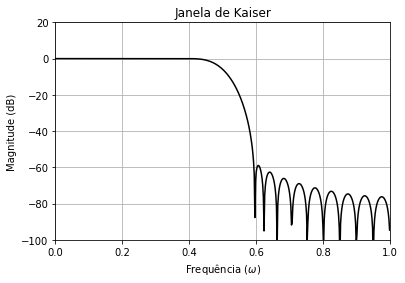

In [ ]:
wKaiser,hKaiser = signal.freqz(Kaiser,1)
hKaiser_dB = 20 * np.log10(np.abs(hKaiser))

plt.plot(wKaiser/np.pi, hKaiser_dB, 'k')


plt.ylim(-100, 20)
plt.xlim(0, 1)
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequência ($\omega$)')
plt.title('Janela de Kaiser')
plt.grid()
plt.show()